# TimeSeriesAnalysis

This notebook performs a comprehensive time series analysis of Bitcoin prices. We begin with data cleaning and decomposition to capture trend, seasonality, and noise. The dataset is split into training and testing sets, and both statistical (ARIMA, SARIMAX) and machine learning (Random Forest, Linear Regression) models are applied for forecasting. Model performances are compared using RMSE, with SARIMAX yielding the best results for capturing seasonal fluctuations, and future prices are forecasted accordingly.

In [154]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore") #optional
plt.style.use('fivethirtyeight') #optional
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Part 1, 2

In [157]:
df = pd.read_csv('bitcoin-price.csv', parse_dates=['Date'])
df.head()

,Date,Price
0,2023-03-25,1775.87
1,2023-03-24,1743.95
2,2023-03-23,1749.80
3,2023-03-22,1815.60
4,2023-03-21,1739.70


In [158]:
df['Date'].min(), df['Date'].max()

(Timestamp('2022-02-28 00:00:00'), Timestamp('2023-03-25 00:00:00'))

In [159]:
df = df.sort_values('Date')

In [160]:
df.isnull().sum()

Date     0
Price    0
dtype: int64

In [161]:
df = df.groupby('Date')['Price'].sum().reset_index()

In [162]:
df

,Date,Price
0,2022-02-28,2975.24
1,2022-03-01,2948.09
2,2022-03-02,2832.50
3,2022-03-03,2617.43
4,2022-03-04,2665.45
...,...,...
386,2023-03-21,1739.70
387,2023-03-22,1815.60
388,2023-03-23,1749.80
389,2023-03-24,1743.95


In [163]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03',
               '2022-03-04', '2022-03-05', '2022-03-06', '2022-03-07',
               '2022-03-08', '2022-03-09',
               ...
               '2023-03-16', '2023-03-17', '2023-03-18', '2023-03-19',
               '2023-03-20', '2023-03-21', '2023-03-22', '2023-03-23',
               '2023-03-24', '2023-03-25'],
              dtype='datetime64[ns]', name='Date', length=391, freq=None)

In [164]:
df

,Price
Date,
2022-02-28,2975.24
2022-03-01,2948.09
2022-03-02,2832.50
2022-03-03,2617.43
2022-03-04,2665.45
...,...
2023-03-21,1739.70
2023-03-22,1815.60
2023-03-23,1749.80


In [165]:
df['2023':]

,Price
Date,
2023-01-01,1213.76
2023-01-02,1214.13
2023-01-03,1256.83
2023-01-04,1250.81
2023-01-05,1269.05
...,...
2023-03-21,1739.70
2023-03-22,1815.60
2023-03-23,1749.80


In [166]:
df.index

DatetimeIndex(['2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03',
               '2022-03-04', '2022-03-05', '2022-03-06', '2022-03-07',
               '2022-03-08', '2022-03-09',
               ...
               '2023-03-16', '2023-03-17', '2023-03-18', '2023-03-19',
               '2023-03-20', '2023-03-21', '2023-03-22', '2023-03-23',
               '2023-03-24', '2023-03-25'],
              dtype='datetime64[ns]', name='Date', length=391, freq=None)

In [167]:
df.values.min(), df.values.max()

(991.39, 3522.6)

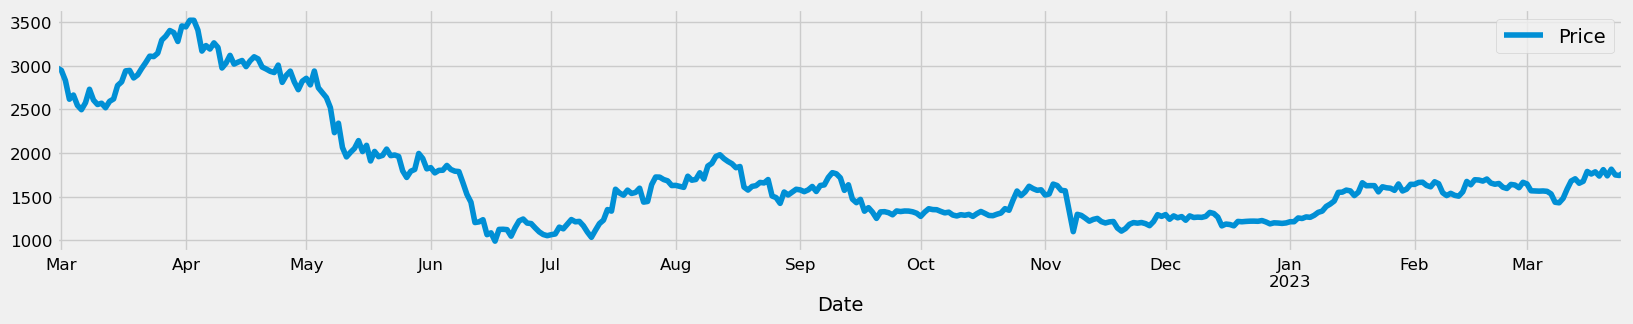

In [168]:
df.plot(figsize=(18, 3))
plt.show()

#### The data has been visualized in the above plot whose trends, seasonality, and residual is shown below.

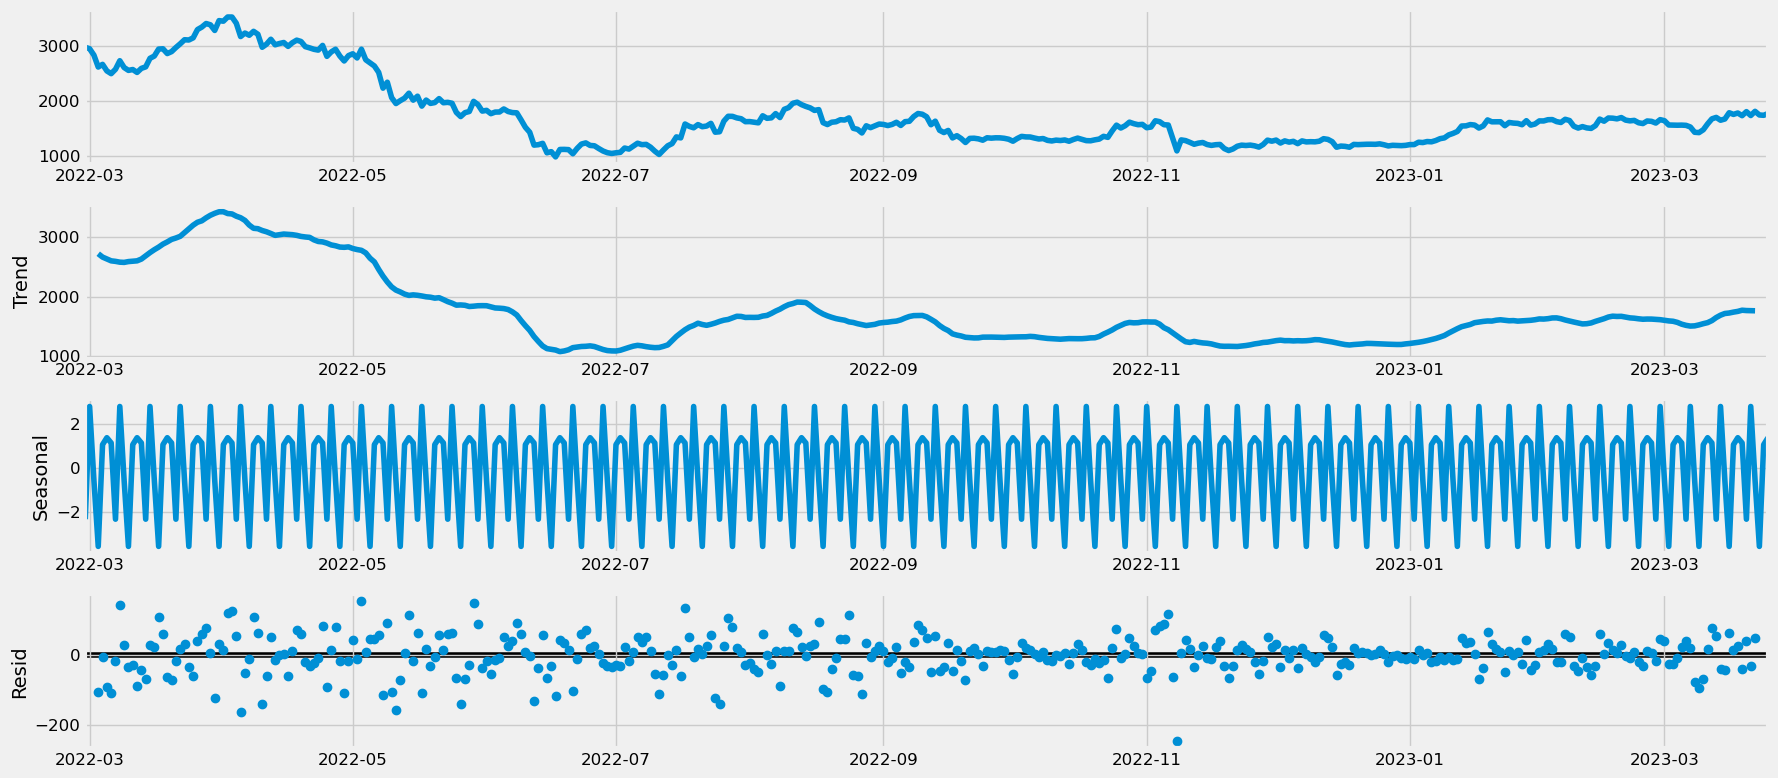

In [169]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
rcParams['figure.figsize'] = 18, 8
fig = decomposition.plot()
plt.show()

#### Trend: There is no regularity in trend i.e. there is no constant increasing and decreasing pattern in the prices over time. The prices first increase after March 2022 but then decreases until it reaches a very small value around the month of August 2022, after which there is no sudden jumps but not even a constant change. Hence the trend shows fluctuations in the prices of bitcoins. 
#### Seasonality: Repeated patterns in data over constant periods of time. The visualization shows values being increasing and decreasing within the range of 2 and -2, 9 times over the course of 2 months. 
#### Residual: This part of the visualization describes the amount of error to predict whether the model will be working fine and if the data is stable. Here, we can see that the data points are closer to zero between September 2022 and November 2022, i.e. the model seems to be working well and the data is stable her. And we can see that there is an outlier between November 2022 and January 2023. The data between March 2022 and May 2022 is unstable as there are a lot of points scattered away from the zero line hence the model does not work well on this unstable data

### Part 3

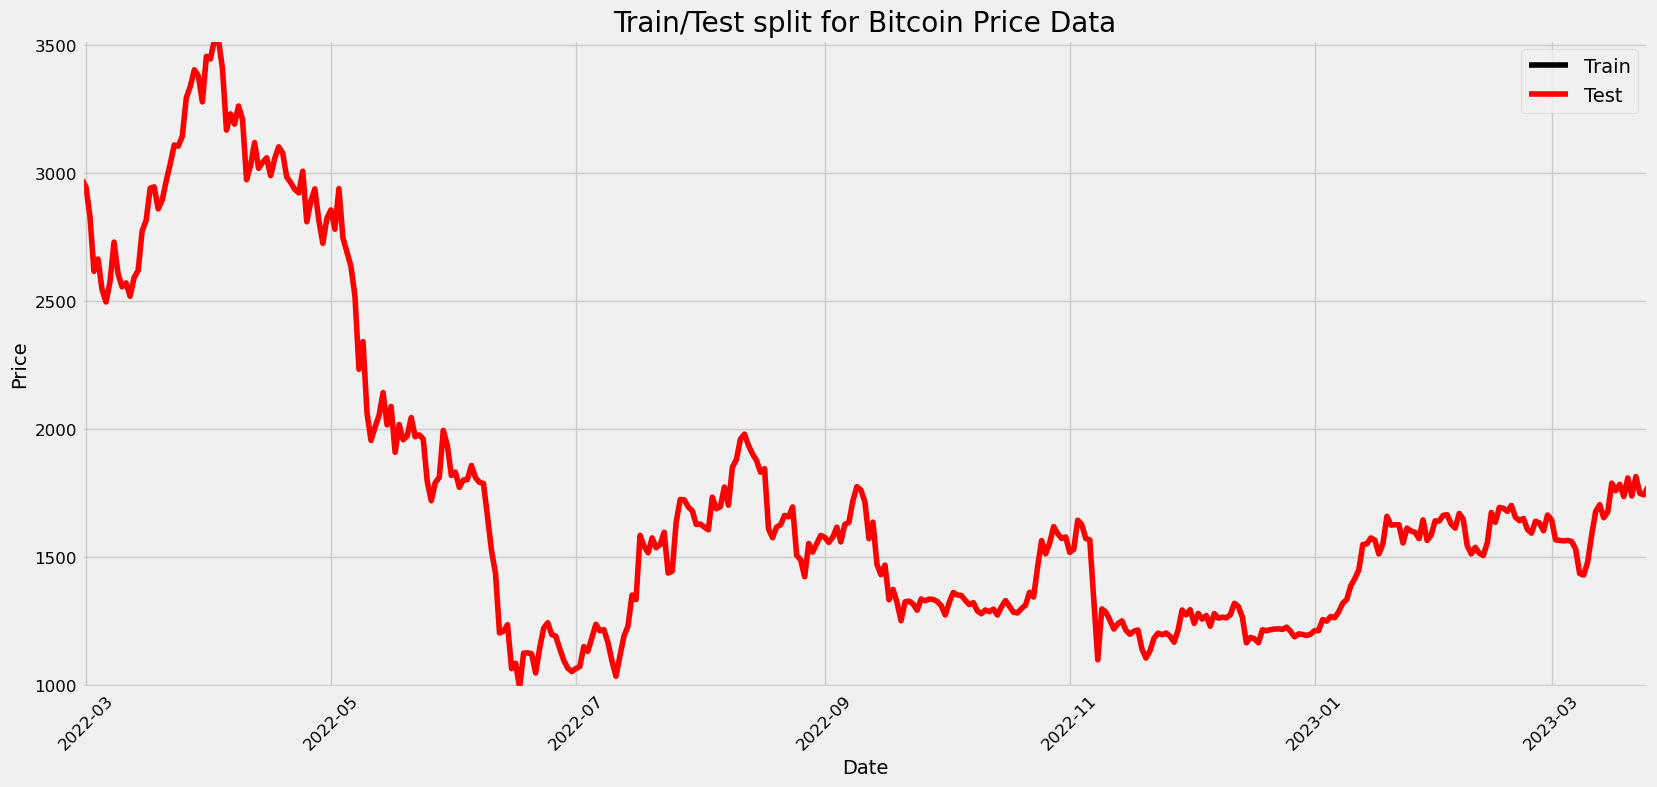

In [57]:
train = df[df.index <= pd.to_datetime("2022-01-01", format='%Y-%m-%d')]
test = df[df.index >= pd.to_datetime("2023-01-01", format='%Y-%m-%d')]

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Bitcoin Price Data")
plt.xlim(["2022-02-28", "2023-03-25"])

plt.ylim([df.values.min(), df.values.max()])
plt.legend()
plt.show()

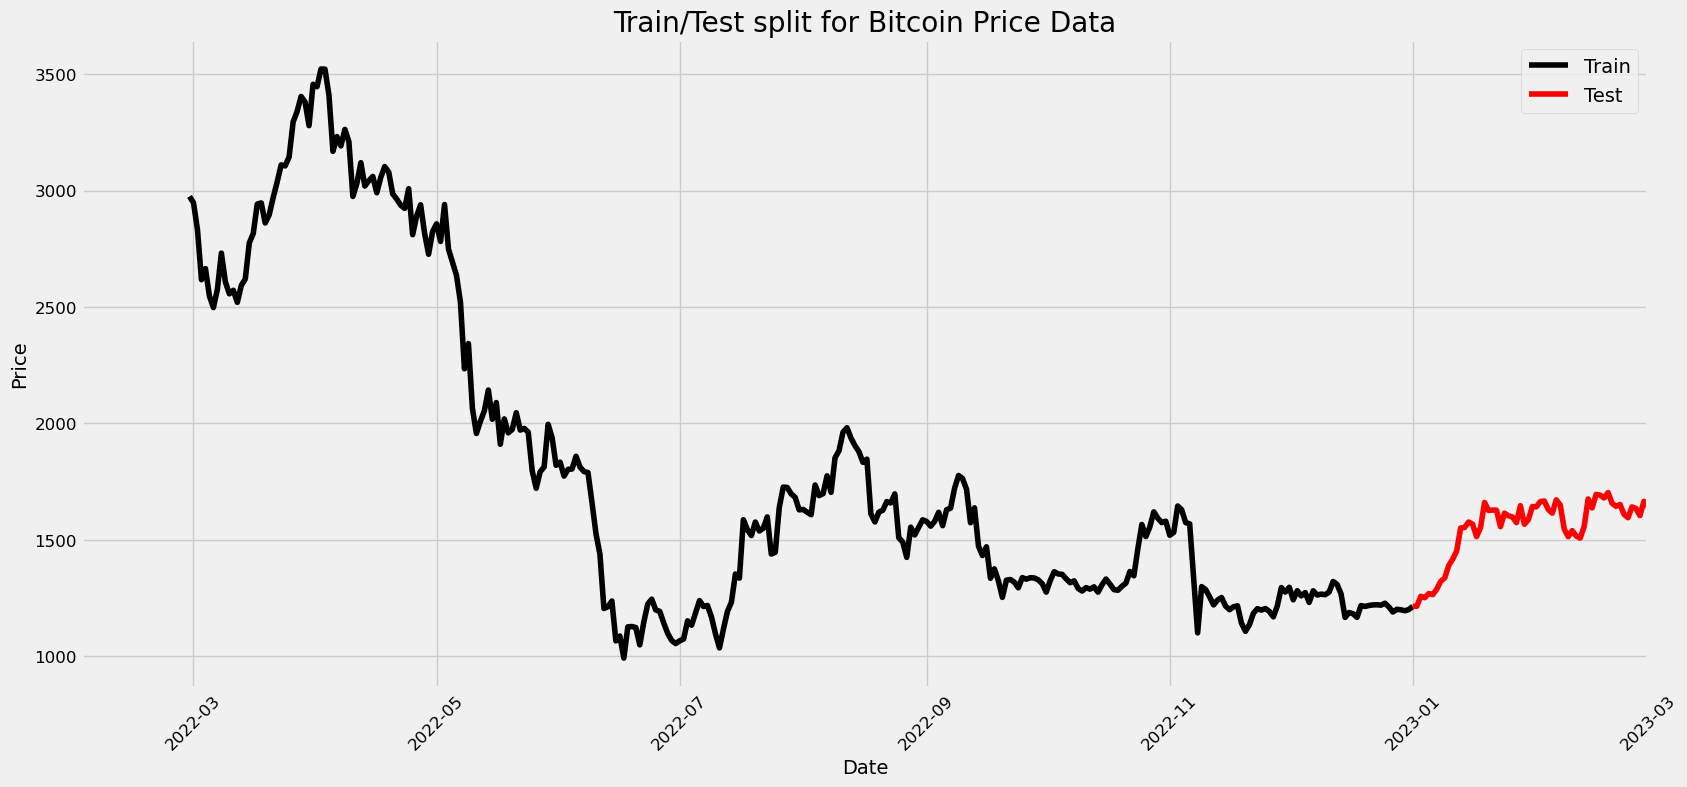

In [63]:
train = df[df.index <= pd.to_datetime("2023-01-01", format='%Y-%m-%d')]
test = df[df.index >= pd.to_datetime("2023-01-01", format='%Y-%m-%d')]

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Bitcoin Price Data")
plt.xlim(["2022-02", "2023-03"])
plt.legend()
plt.show()

#### Train set: All the data before 2023 has been marked as black to be counted for as the training set. This data will be used to train the model.
#### Test set: All data after 2023 has been marked as red and will be used to test the model, thus comprising the test set. 

## Using Statistical Models

### Part 4 - ARIMA
#### ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average

In [64]:
from statsmodels.tsa.arima.model import ARIMA

There are three distinct integers (p, d, q) that are used to parametrize ARIMA models. Because of that, ARIMA models are denoted with the notation ARIMA(p, d, q). Together these three parameters account for seasonality, trend, and noise in datasets:

p is the auto-regressive part of the model. It allows us to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days. Also called Lagging parameter.

d is the integrated part of the model. This includes terms in the model that incorporate the amount of differencing (i.e. the number of past time points to subtract from the current value) to apply to the time series. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small. This is what makes non-stationary data stationary)

q is the moving average part of the model. This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past. It also corresponds to the white noise (for modeling shock events). 

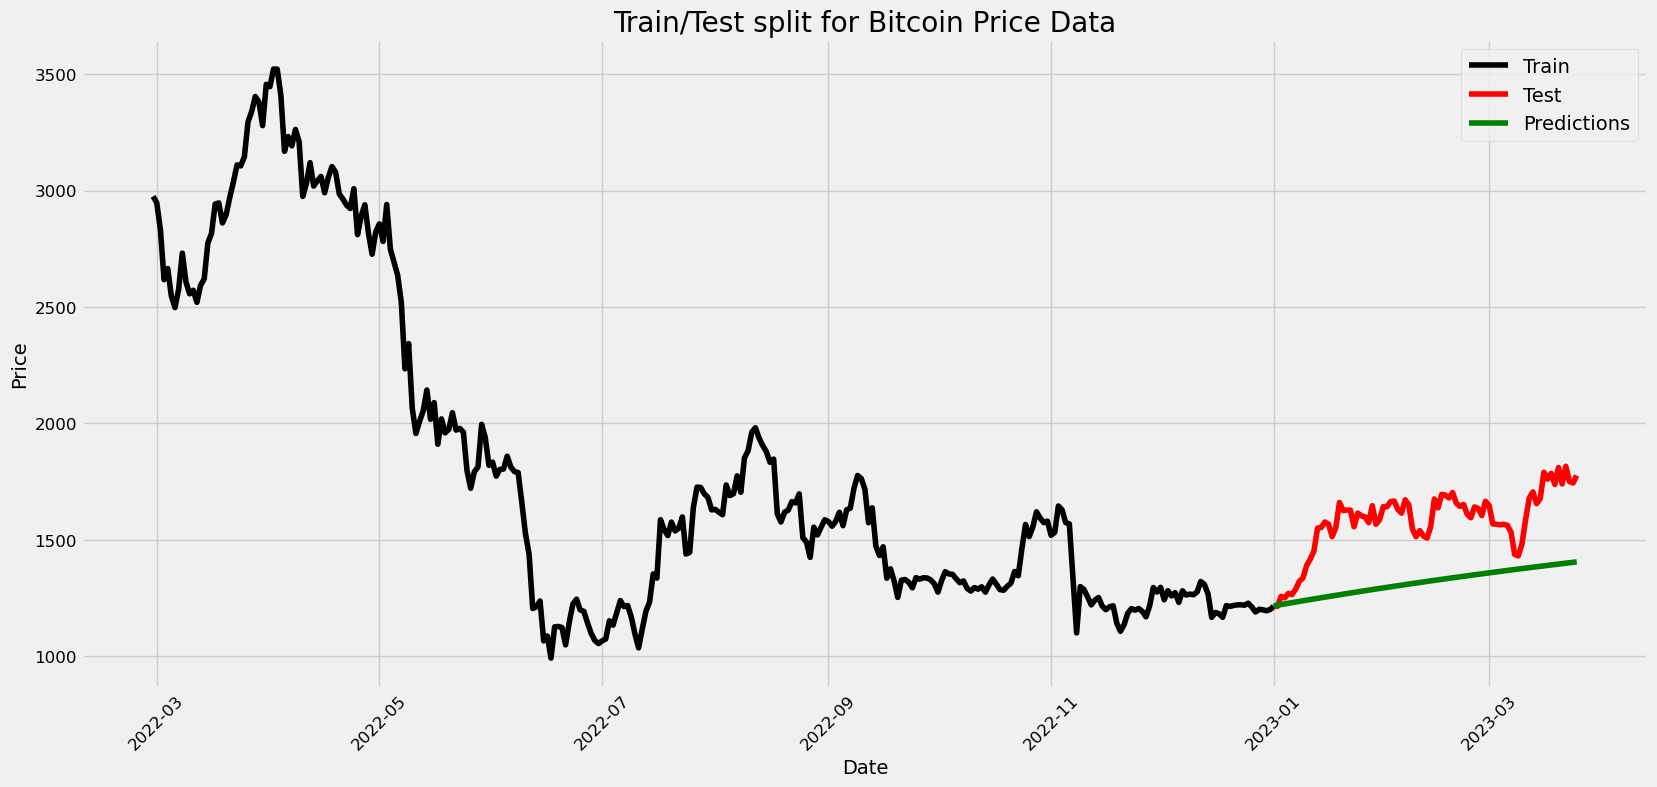

RMSE:  284.98316130074494


In [65]:
ARIMAmodel = ARIMA(train, order = (1, 0, 1))

ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index)) #only providing dates (test.index) from test as input for forecasting

y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for plotting purposes
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Bitcoin Price Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

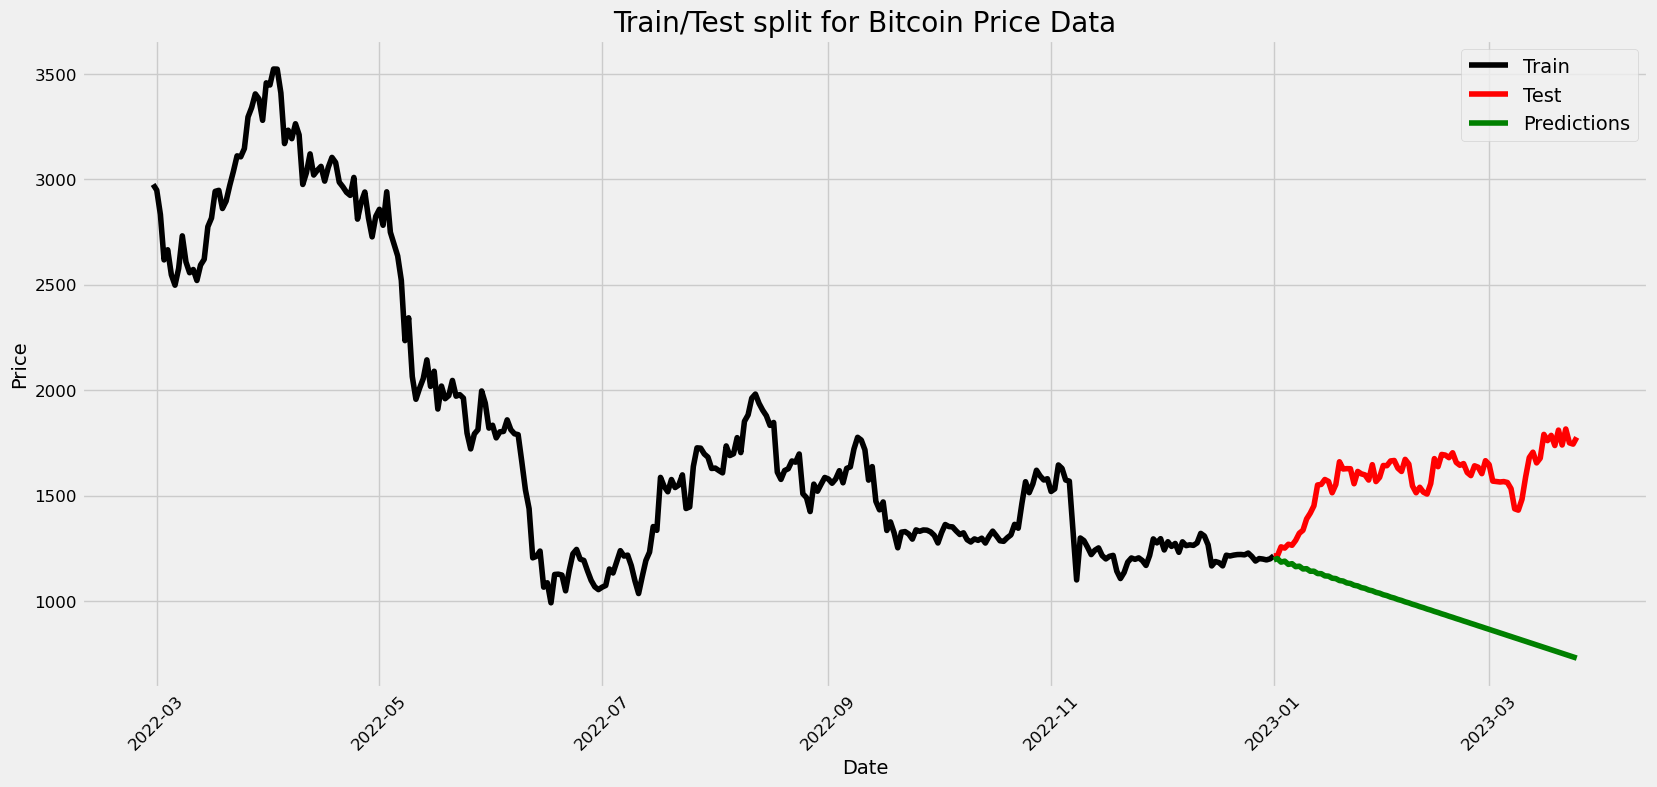

RMSE:  666.1370518567751


In [68]:
ARIMAmodel = ARIMA(train, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Bitcoin Price Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

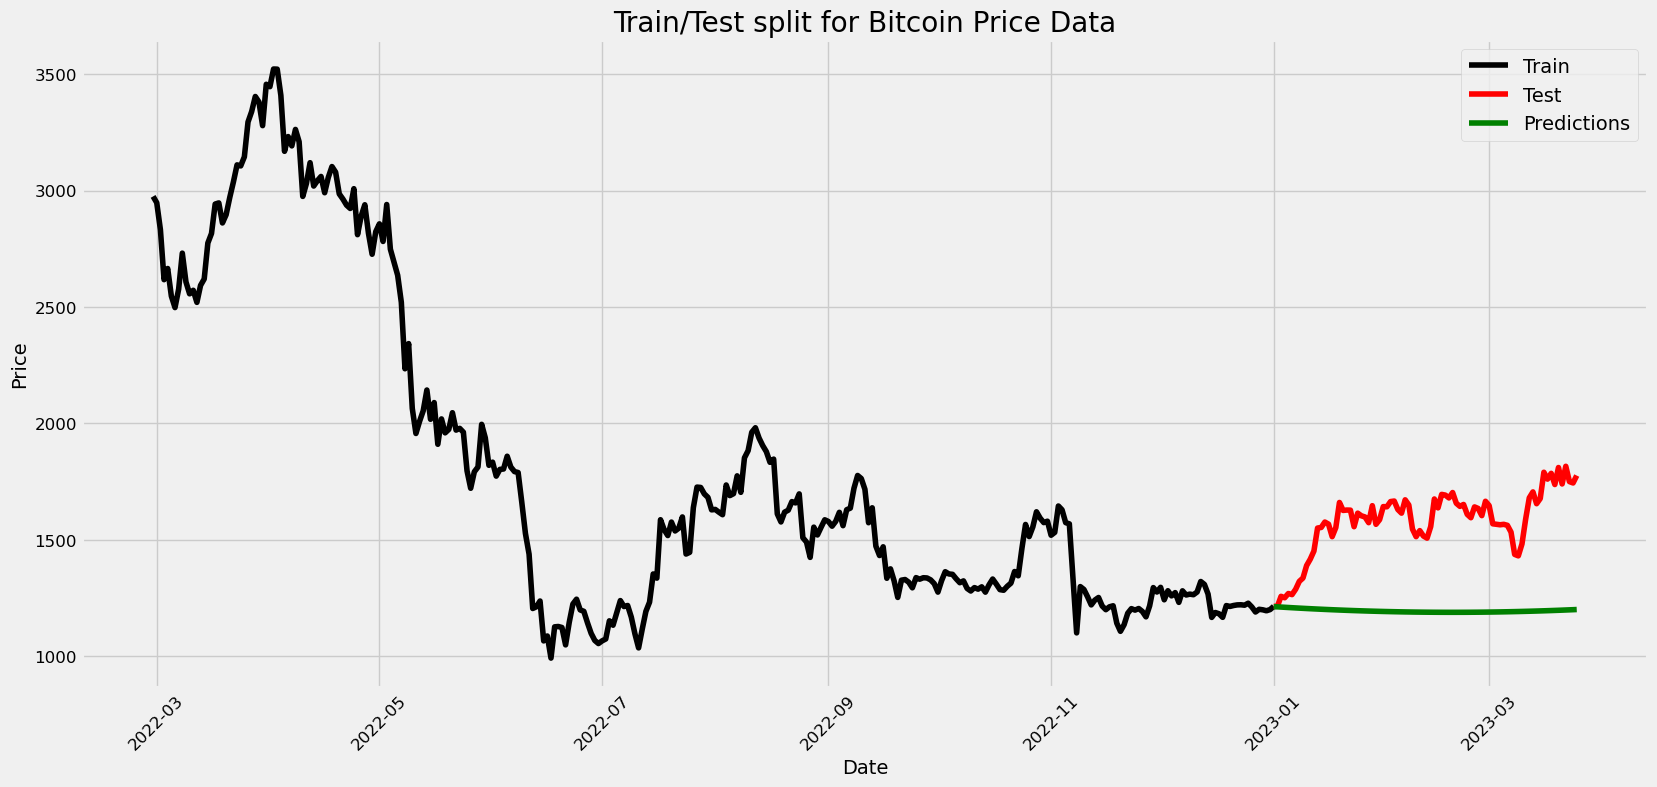

RMSE:  411.4991673008403


In [69]:
ARIMAmodel = ARIMA(train, order = (2, 3, 2))
ARIMAmodel = ARIMAmodel.fit()
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Bitcoin Price Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

#### The most optimal results are achieved when using the following values of parameters in the ARIMA Model:
#### 1. p = 1 - The effect of past values needs to be kept 1 as the lagging parameter.
#### 2. d = 0 - The integrated part of model suggests that no differencing is required in this particualr scenario.
#### 3. q = 1 - The error of the model needs to be kept at 1 w.r.t. previous timestamps.
#### With the above values of parameters, we get the minimum RMSE i.e. 284.98.

### Part 5 - SARIMAX

#### SARIMAX(Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors) is an updated version of the ARIMA model. we can say SARIMAX is a seasonal equivalent model like SARIMA and Auto ARIMA. It can also deal with external effects.

Trend Elements
There are three trend elements that require configuration.

They are the same as the ARIMA model; specifically:

p: Trend autoregression order.

d: Trend difference order.

q: Trend moving average order.

Seasonal Elements
There are four seasonal elements that are not part of ARIMA that must be configured; they are:

P: Seasonal autoregressive order.

D: Seasonal difference order.

Q: Seasonal moving average order.

m: The number of time steps for a single seasonal period.

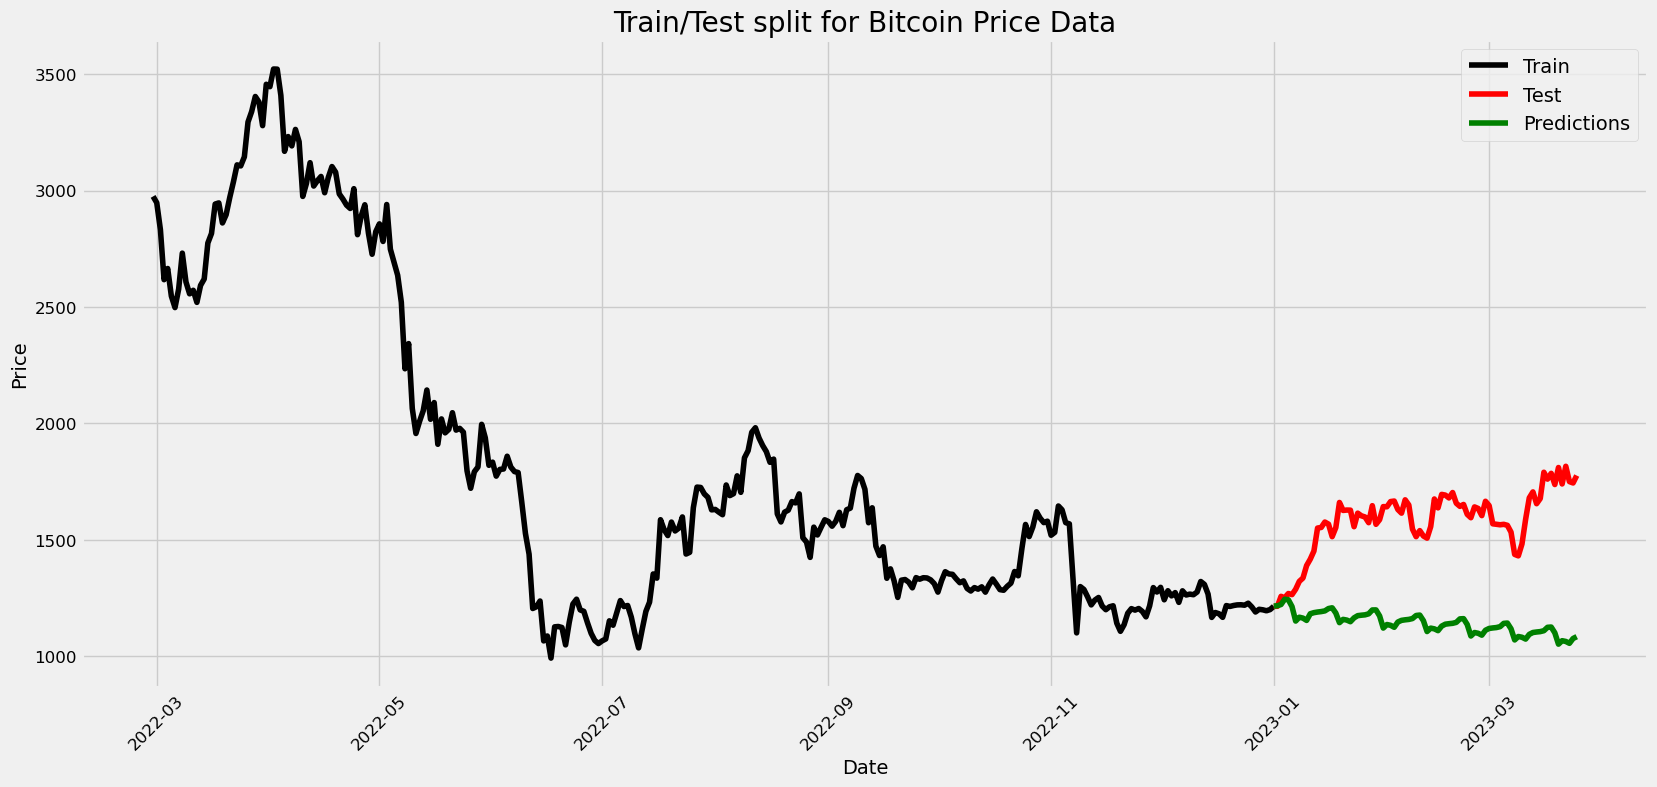

RMSE:  470.50687935285225


In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

SARIMAXmodel = SARIMAX(train,order=(1, 1, 1),seasonal_order=(1, 1, 0, 12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Bitcoin Price Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

#### The error is not quite small as the RMSE value comes out to be 470.5 and the prediction line is also not accurately matching with the actual results in the plot above, indicating that this is not a very good model. So we will try to find the optimal parameters to make the model more accurate. 

### Part 6 - Grid Search for SARIMAX for optimal parameter

In [71]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [25]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:588.8073656354633
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1013.3220167496224
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:333.42301437135455
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:160.8980325151971
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:352.24508004766125


C:\Users\zeeha\anaconda3\envs\python-r\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:334.507490181903
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:175.38942922952057
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:162.86109745786672
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:550.5783033904556


C:\Users\zeeha\anaconda3\envs\python-r\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1729.0780414882024
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:322.1266824774403
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:149.52864752901047
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:353.83931218511935
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:323.44567635952615
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:176.19800489216064
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:150.06780979465603
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:522.1157354376996
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:338.68913418613874
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:334.8048074862546
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:152.17758742250714
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:348.4864371900195
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:332.21212196067034
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:165.0024664395075
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:153.60365306059705
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:493.390451807476
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:314.6628170184809
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:312.92323522114845


C:\Users\zeeha\anaconda3\envs\python-r\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1131.0928318572464
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:335.1516315776304
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:162.14444984653946
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:336.7852975130783
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:336.04449796163476
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:162.11004514392675
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:161.94855194886054
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:510.1626724935524
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:512.3544956339202


C:\Users\zeeha\anaconda3\envs\python-r\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:324.0781687074353
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:150.8174161722442
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:338.53378868605984
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:325.30417721542034
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:164.36249979463517
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:151.96335006449104
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:516.8584655764606
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:332.7888473104547
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:330.49665848684026
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:153.75398823243046
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:328.977728039099
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:329.44375906848325
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:153.7929961954431
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:155.4873856222136
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:494.6944737777375
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:316.6263471574907
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:314.7848239128734
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:139.7551294595834
ARIM

#### ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:137.75675850395174
#### The above parameters give the lowest value of AIC i.e. 137.756

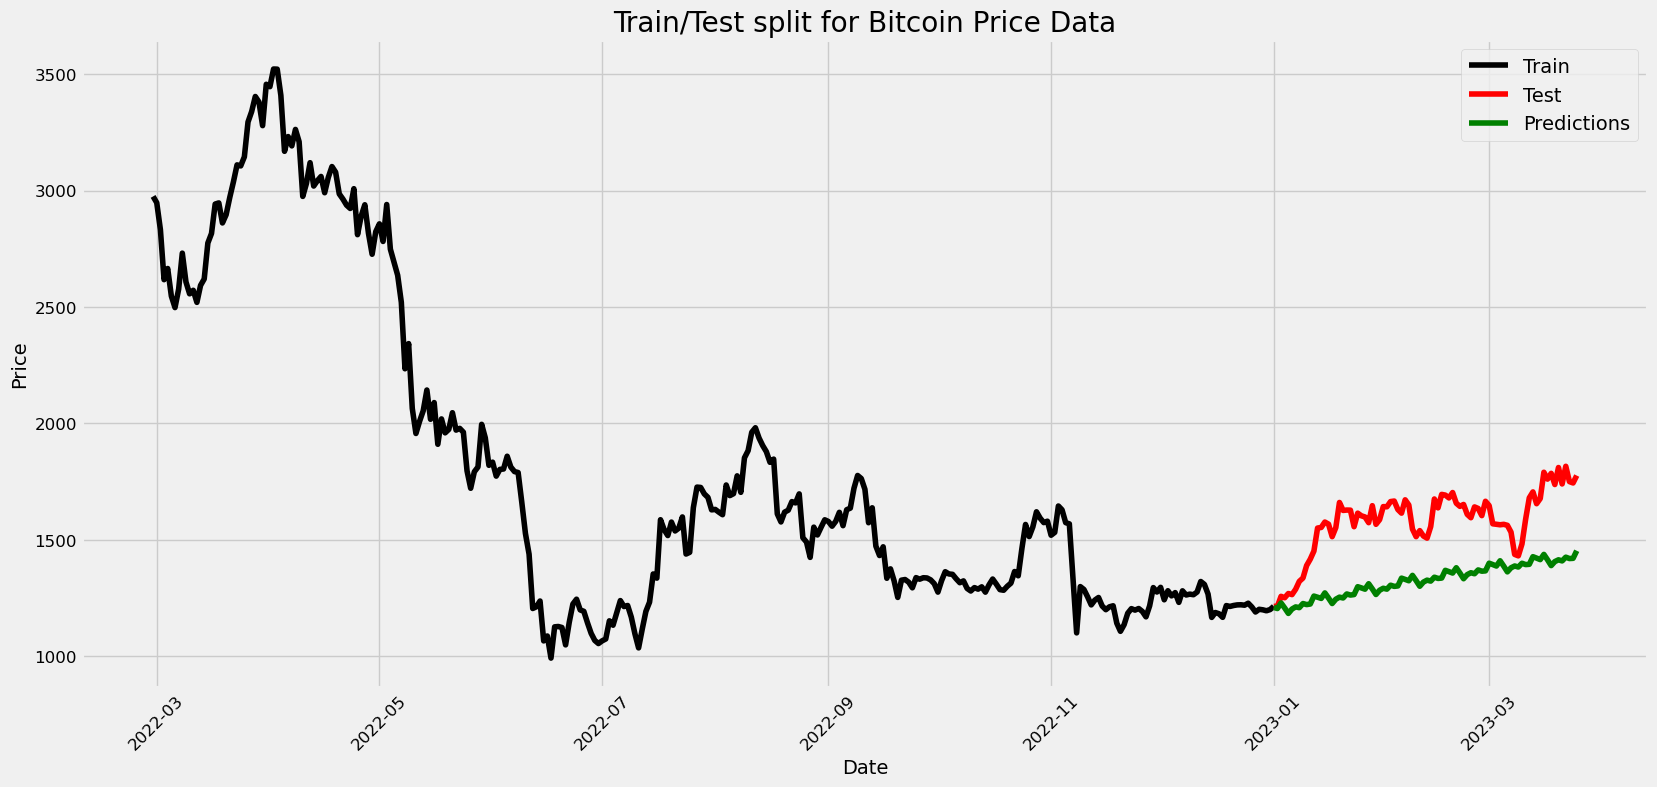

RMSE:  275.42632055185544


In [108]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

SARIMAXmodel = SARIMAX(train,order=(1, 0, 0),seasonal_order=(0, 1, 1, 12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Bitcoin Price Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

#### These parameters did not improve the performance of our SARIMAX Model to give better predictions and decrease RMS Error, so by trial and error, we take the values  ARIMA(1, 0, 0)x(0, 1, 1, 12)12 that gives an AIC of 162.14444984653946 but the RMSE reduces to 275.4 which is a big improvement over the previous RMSE of 470.5. The prediction curve is also approaching closer to the actual curve which indicates the accuracy of the model is getting better.

#### Comparion: ARIMA VS SARIMAX
#### RMSE of ARIMA (with optimal parameters) = 284.98
#### RMSE of SARIMAX (with optimal paramters) = 275.4
#### These results show that SARIMAX gave a slightly better performance than ARIMA in this case. Since SARIMAX adds additional parameters in the ARIMA model only, its performance improved as seasonal elements were incorporated into the older ARIMA model. 
#### In visualization, ARIMA showed a straight line for predictions whereas the actual data has varying data points, which is shown by the fluctuations in the predictions by SARIMAX. This is also why SARIMAX proved to be better as it could capture varying data and fluctuations in it.

### Part 7 - Using Machine Learning Model

In [110]:
import numpy as np
 
# extract the seasonality data
months = [x.month for x in train.index]
years = [x.year for x in train.index]
day = [x.day for x in train.index]
 
# convert into one matrix
X = np.array([day, months, years]).T
Y = train.values

In [111]:
X[:10]

array([[  28,    2, 2022],
       [   1,    3, 2022],
       [   2,    3, 2022],
       [   3,    3, 2022],
       [   4,    3, 2022],
       [   5,    3, 2022],
       [   6,    3, 2022],
       [   7,    3, 2022],
       [   8,    3, 2022],
       [   9,    3, 2022]])

In [112]:
Y[:10]

array([[2975.24],
       [2948.09],
       [2832.5 ],
       [2617.43],
       [2665.45],
       [2547.04],
       [2497.57],
       [2576.84],
       [2731.53],
       [2607.94]])

In [113]:
# extract the day, month and year data
tmonths = [x.month for x in test.index]
tyears = [x.year for x in test.index]
tday = [x.day for x in test.index]
 
# convert into one matrix
testX = np.array([tday, tmonths, tyears]).T
testY = test.values

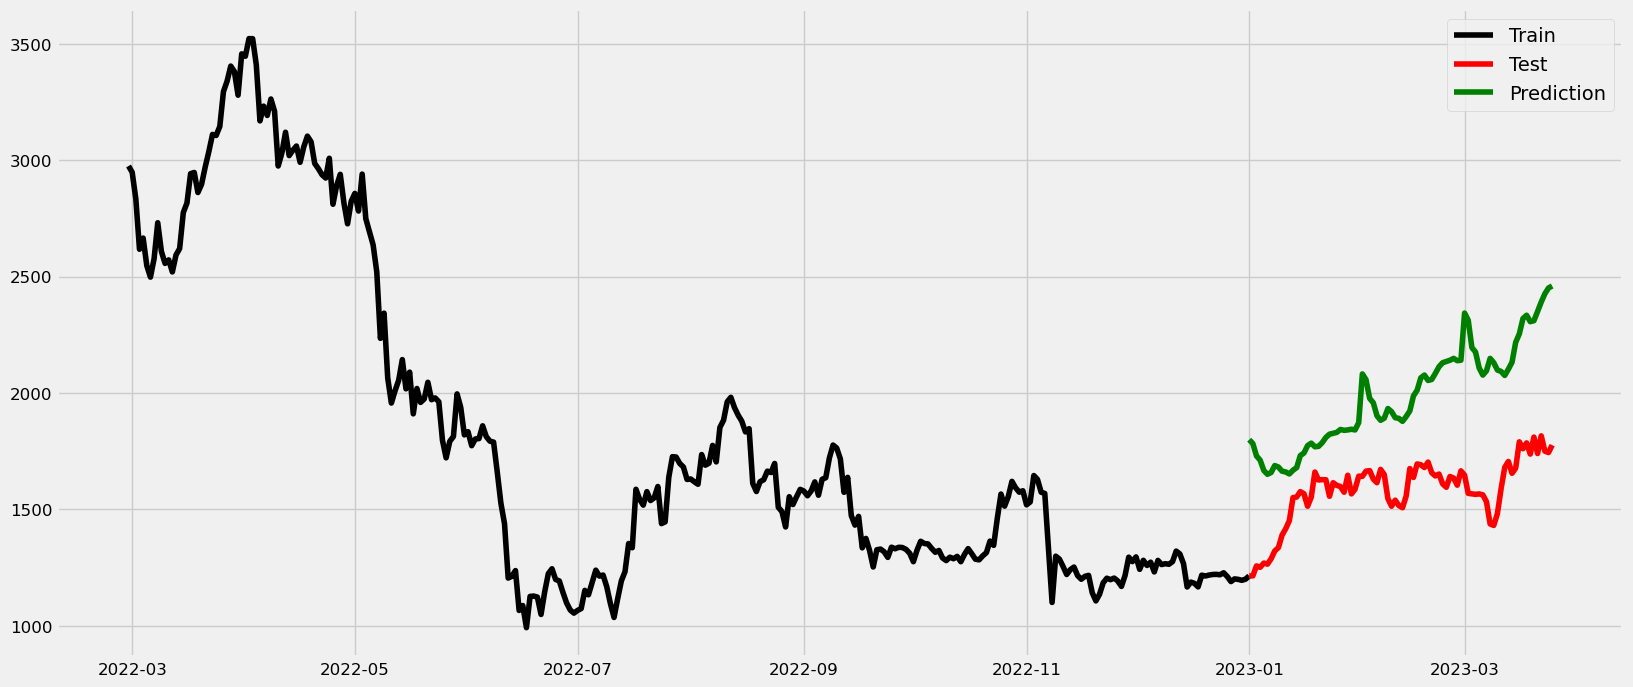

RMSE:  435.27526346454863


In [114]:
from sklearn.ensemble import RandomForestRegressor
 
# fit the model
rfmodel = RandomForestRegressor()
rfmodel.fit(X,Y)
 
# predict on the same period
preds = rfmodel.predict(testX)
 
# plot what has been learned
plt.plot(train.index, train.values,color="black", label='Train')
plt.plot(test.index, test.values,color="red", label='Test')
plt.plot(test.index, preds, color="green",label='Prediction')
plt.legend()
plt.show()
rf_rmse = np.sqrt(mean_squared_error(test.values, preds))
print("RMSE: ",rf_rmse)

#### The Random Forest regressor gives RMSE of 435.2 which is not a very good error but the green prediction line is fairly close to the actual test data, with similar fluctuations being shown as in the actual. So this model can said to be a good predictor of trends in data as it may capture fluctuating values, but it may not be able to predict the values very close to the original data. 

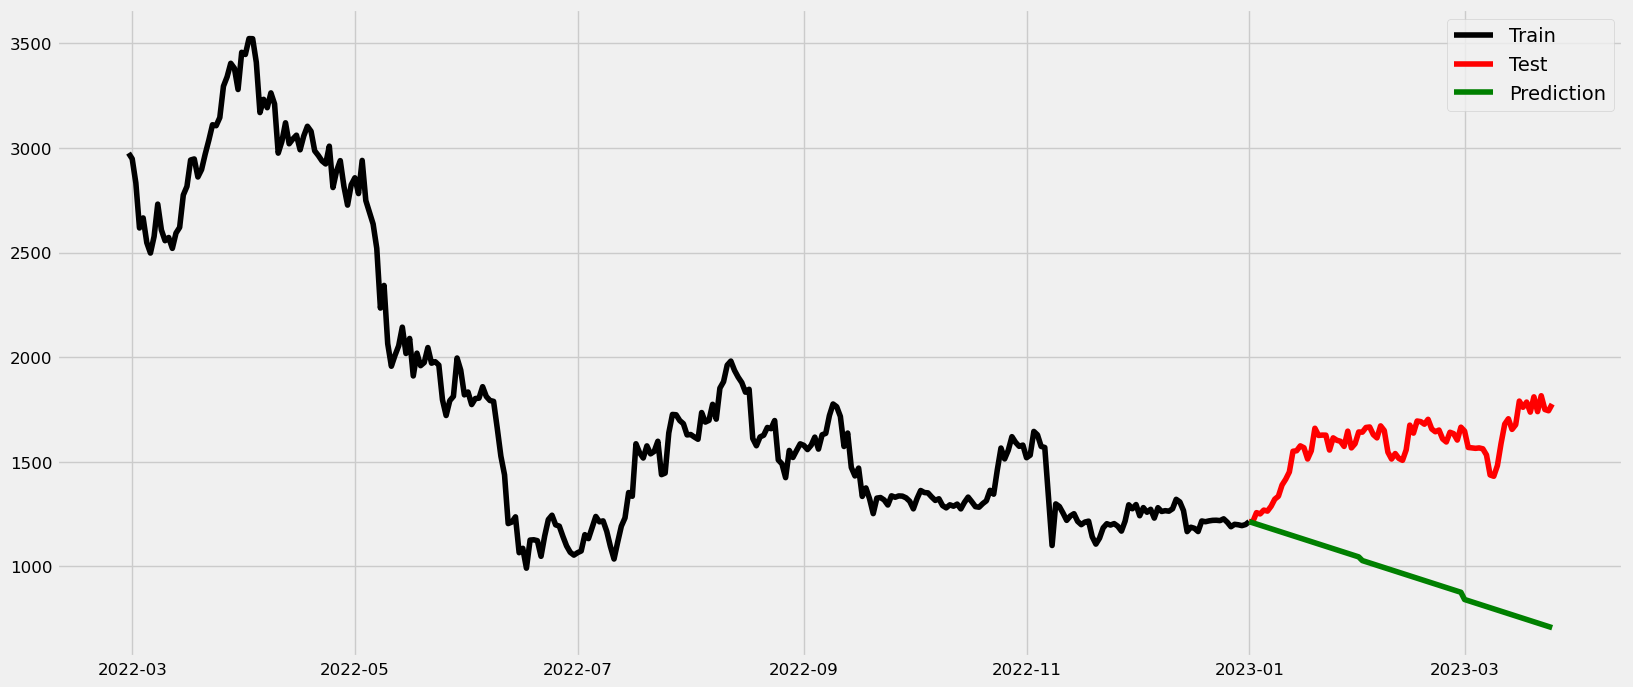

RMSE:  670.806320474616


In [121]:
from sklearn.linear_model import LinearRegression
 
# fit the model
rfmodel = LinearRegression()
rfmodel.fit(X,Y)
 
# predict on the same period
preds = rfmodel.predict(testX)
 
# plot what has been learned
plt.plot(train.index, train.values,color="black", label='Train')
plt.plot(test.index, test.values,color="red", label='Test')
plt.plot(test.index, preds, color="green",label='Prediction')
plt.legend()
plt.show()
rf_rmse = np.sqrt(mean_squared_error(test.values, preds))
print("RMSE: ",rf_rmse)

#### Linear Regression did not yield very good results as the RMSE is very large, i.e. 670.8, and the predictions are also deviating away from the actual test data. It can not even capture the variations in data. This model can not be used for future predictions.

### Part 8 - Comparison of all RMSEs:
#### ARIMA - 284.98
#### SARIMAX - 275.4
#### Random Forest - 435.2
#### Linear Regression - 670.8
#### The above values for error show that SARIMAX outperformed all the other models yielding the lowest error and closest prediction line to the actual data. It is even better than ML Regression techniques.

### Part 9 - Generating Future Dates for Prediction

In [138]:
futureX = pd.date_range(start='01/04/2023', end='30/06/2023')

In [139]:
futureX

DatetimeIndex(['2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07',
               '2023-01-08', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13',
               ...
               '2023-06-21', '2023-06-22', '2023-06-23', '2023-06-24',
               '2023-06-25', '2023-06-26', '2023-06-27', '2023-06-28',
               '2023-06-29', '2023-06-30'],
              dtype='datetime64[ns]', length=178, freq='D')

In [145]:
future = pd.DataFrame(index=futureX, columns= df.columns)
df = pd.concat([df, future])


### Forcasting future values using SARIMAX

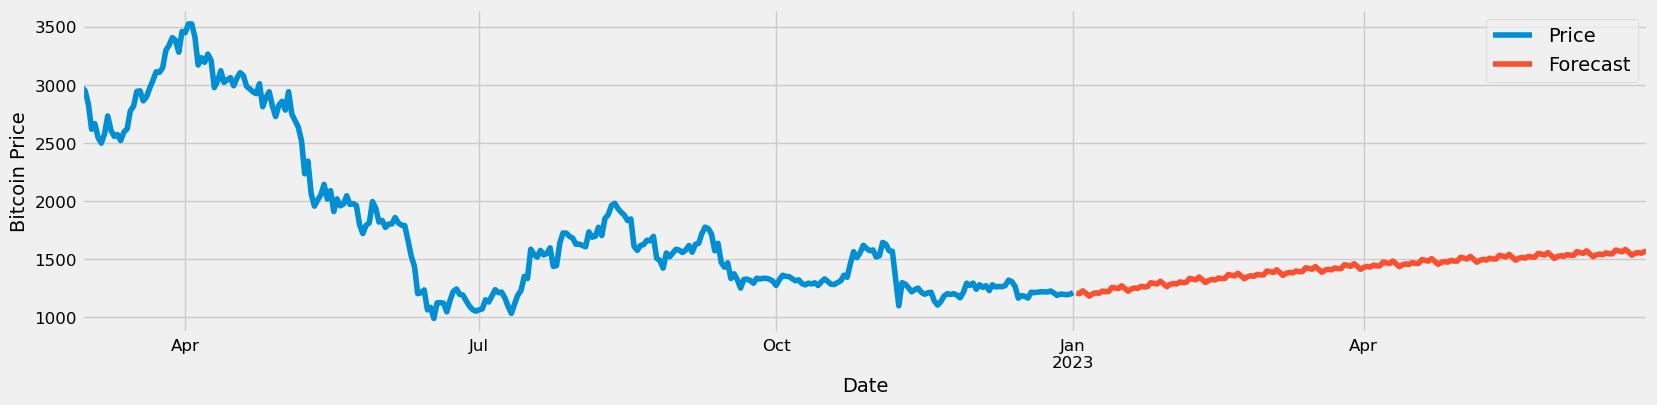

In [146]:
# SARIMAX
pred_uc = SARIMAXmodel.get_forecast(steps=len(futureX)) # next 100 months forecast
pred_ci = pred_uc.conf_int()
ax = train.plot(label='observed', figsize=(18, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin Price')
plt.legend()
plt.show()

### Part 10 - Forcasting future values using ML Regressor

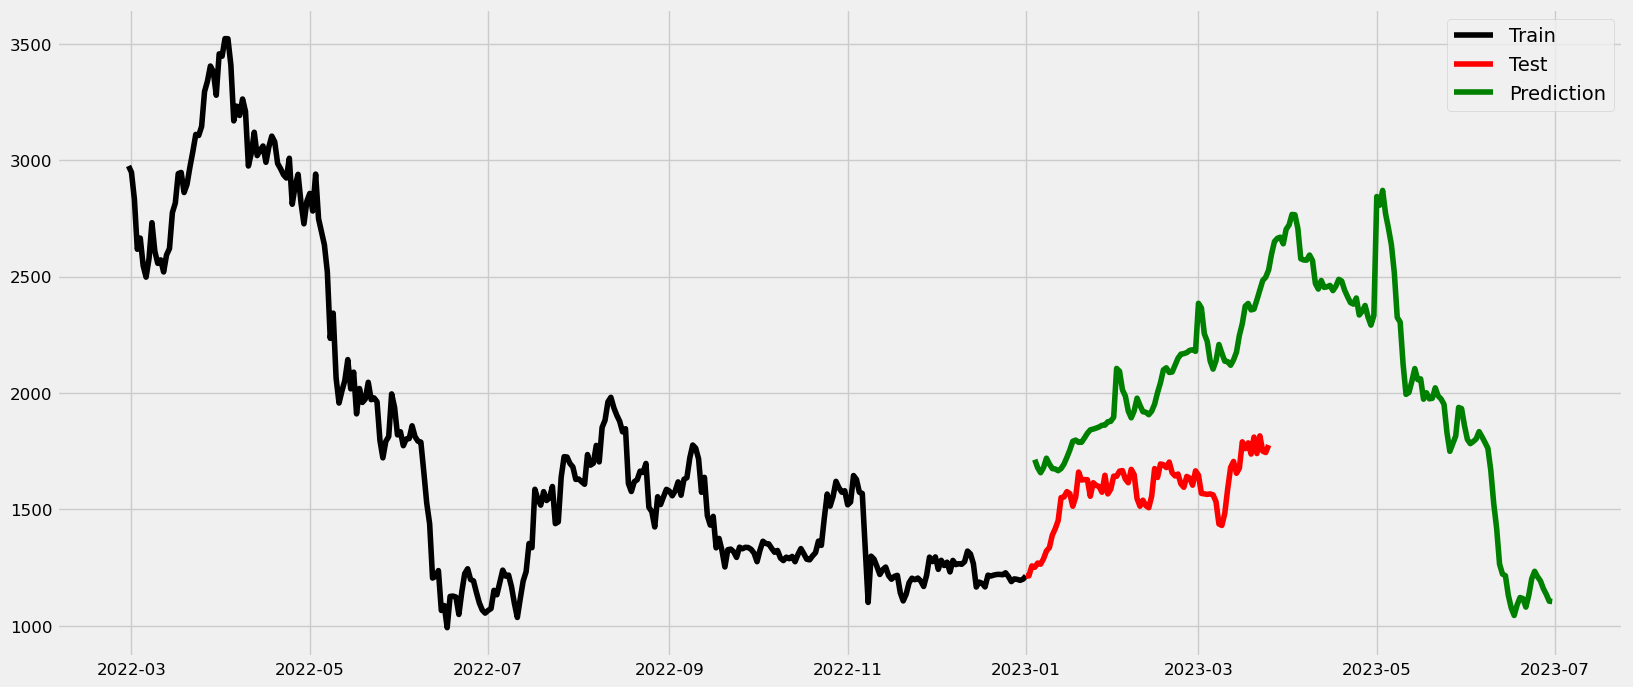

In [153]:
# Random Forest
test_X = np.array([t_day, t_months, t_years]).T

# fit the model
rfmodel = RandomForestRegressor(random_state=99)
rfmodel.fit(X, Y)

# predict on the same period
preds = rfmodel.predict(test_X)

# plot what has been learned
plt.plot(train.index, train.values, color="black", label='Train')
plt.plot(test.index, test.values, color="red", label='Test')
plt.plot(futureX, preds, color="green", label='Prediction')
plt.legend()
plt.show()


### Part 11 - Discussion of visualizations

#### The above visualizations show that SARIMAX predicts the fluctuations in forecast with seasonality, i.e. it shows variability in data with every season which is why it can used to show the practical application of the data. It can produce predictions in a similar fashion as the previous seasonality and trends follow.
#### The random forest, though, could capture the fluctuations over data but the predictions are far from the actual value as we saw its RMSE value was very high as compaerd to SARIMAX so this model cannot be chosen over the earlier one. SARIMAX, with its seasonality elements and overall optimal parameters can be used as a prediction model for predicting the price of bitcoins over the months.